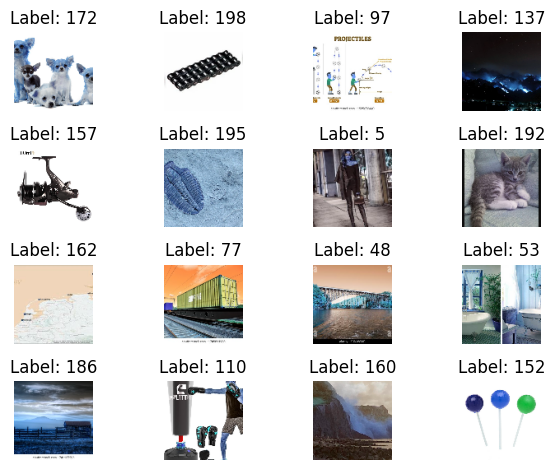

In [34]:
import h5py
import matplotlib.pyplot as plt


filepath = '/honey/nmep/medium-imagenet-96.hdf5'

# Open the HDF5 file
with h5py.File(filepath, 'r') as hf:
    images = hf['images-train'][:16] # get the first 16 images
    labels = hf['labels-train'][:16] # get the first 16 labels
    
    # transpose images from (C, H, W) into (H, W, C) 
    images = [image.transpose(1, 2, 0) for image in images]

    fig, ax = plt.subplots(4, 4)
    for i in range(4):
        for j in range(4):
            ax[i, j].imshow(images[i * 4 + j])
            ax[i, j].axis('off')
            ax[i, j].set_title(f"Label: {labels[i * 4 + j]}")
    plt.tight_layout()
    plt.show()


=> merge config from configs/resnet18_base.yaml
=> merge config from configs/resnet18_medium_imagenet.yaml


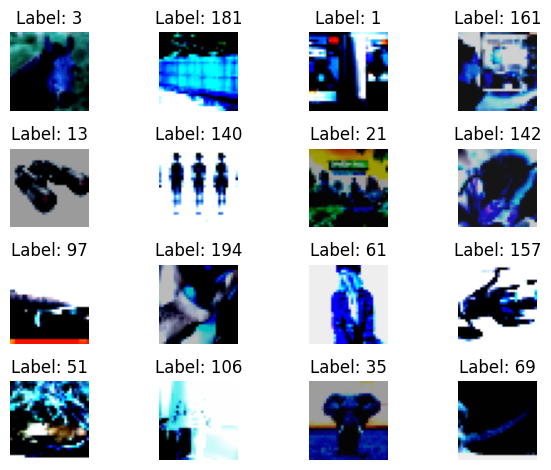

In [3]:
import argparse
from config import get_config
from data.build import build_loader
import matplotlib.pyplot as plt

def parse_options(**kwargs):
    parser = argparse.ArgumentParser("Vision model training and evaluation script", add_help=False)
    parser.add_argument("--cfg", type=str, required=True, metavar="FILE", help="path to config file")
    parser.add_argument("--opts", help="Modify config options by adding 'KEY VALUE' pairs.", default=None, nargs="+")
    parser.add_argument("--batch-size", type=int, help="batch size for single GPU")
    parser.add_argument("--data-path", type=str, help="path to dataset")
    parser.add_argument("--resume", help="resume from checkpoint")
    parser.add_argument(
        "--output",
        default="output",
        type=str,
        metavar="PATH",
        help="root of output folder, the full path is <output>/<model_name>/<tag> (default: output)",
    )
    parser.add_argument("--eval", action="store_true", help="Perform evaluation only")
    parser.add_argument("--throughput", action="store_true", help="Test throughput only")
    
    # Convert keyword arguments into a list of command-line style arguments
    args_list = []
    for key, value in kwargs.items():
        # Convert key to command-line style argument (e.g., cfg -> --cfg)
        arg_key = f"--{key}"
        
        # Handle boolean values
        if isinstance(value, bool):
            if value:
                args_list.append(arg_key)
        else:
            args_list.extend([arg_key, str(value)])
    
    # Parse arguments
    args = parser.parse_args(args_list)
    
    # Get configuration
    config = get_config(args)
    
    return args, config

def visualize():
    config_options = {
        "cfg": "configs/resnet18_medium_imagenet.yaml",
    }
    
    # Parse options
    args, config = parse_options(**config_options)
    dataset_train, dataset_val, dataset_test, data_loader_train, data_loader_val, data_loader_test = build_loader(
        config
    )

    NUM_IMAGES = 16
    batch = next(iter(data_loader_train))
    images, labels = batch
    images = images[:NUM_IMAGES]
    labels = labels[:NUM_IMAGES]

    fig, axs = plt.subplots(4, 4)
    for i in range(4):
        for j in range(4):
            idx = i * 4 + j
            img = images[idx].permute(1, 2, 0)
            axs[i, j].imshow(img)
            axs[i, j].set_title(f"Label: {labels[idx]}")
            axs[i, j].axis("off")
    plt.tight_layout()
    plt.show()

visualize()